In [120]:
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt

# Initialization

In [64]:
S0 = 50
r = 0.05
K = 50
V = 45
sigma = 0.3
N = 252
n = 252
mean = (r - sigma*sigma/2)/N
var = sigma/math.sqrt(N)

# Monte Carlo and Antithetic Variables Variance Reduction Technique


In [130]:
print("The BSM price for the same call option is 7.11563.")
error = [1e-3,1e-4,1e-5,1e-6]
ans = []
ans2 = []
for e in range(len(error)):
    k = math.ceil(sigma*sigma/error[e])
    print("")
    print("We will do the monte carlo ",k," times.")
    down_in = []
    down_out = []
    down_in_r = []
    down_out_r = []
    for j in range(k):
        print(j,end="\r")
        
        #this is for monte catlo 
        d = np.random.normal(mean,var,n) 
        sd = [S0]
        I = 0
        J = 1
        for i in range(len(d)):
            sd.append(sd[i]*math.exp(d[i]))
            if (sd[i]<V): 
                I = 1
            if(sd[i]<V):
                J = 0
        down_in.append(math.exp(-r*n/N)*I*max(0,sd[n]-K))
        down_out.append(math.exp(-r*n/N)*J*max(0,sd[n]-K))
        
        #this is for Antithetic Variables Variance Reduction Technique
        d2 = 2*(r - sigma*sigma/2)/N - d 
        sd2 = [S0]
        I2 = 0
        J2 = 1
        for i in range(len(d2)):
            sd2.append(sd2[i]*math.exp(d2[i]))
            if (sd2[i]<V): 
                I2 = 1
            if(sd2[i]<V):
                J2 = 0
        down_in_r.append((math.exp(-r*n/N)*I2*max(0,sd2[n]-K)+down_in[j])/2)
        down_out_r.append((math.exp(-r*n/N)*J2*max(0,sd2[n]-K)+down_out[j])/2)
        
    print("Monte Carlo Result : ",(sum(down_in)+sum(down_out))/k)
    print("Efficiency will be",100-abs((sum(down_in)+sum(down_out))/k-7.11563)/0.0711563)
    print("Antithetic Variables Variance Reduction Technique Result : ",(sum(down_in_r)+sum(down_out_r))/k)
    print("Efficiency will be",100-abs((sum(down_in_r)+sum(down_out_r))/k-7.11563)/0.0711563)
    ans.append((sum(down_in)+sum(down_out))/k)
    ans2.append((sum(down_in_r)+sum(down_out_r))/k)
    

The BSM price for the same call option is 7.11563.

We will do the monte carlo  90  times.
Monte Carlo Result :  7.546872640444083
Efficiency will be 93.93950162608114
Antithetic Variables Variance Reduction Technique Result :  6.3733127652118435
Efficiency will be 89.56779322718921

We will do the monte carlo  900  times.
Monte Carlo Result :  7.4564148374066495
Efficiency will be 95.2107566384614
Antithetic Variables Variance Reduction Technique Result :  7.0397505439251375
Efficiency will be 98.93362279833461

We will do the monte carlo  9000  times.
Monte Carlo Result :  7.086473306918725
Efficiency will be 99.59024439042959
Antithetic Variables Variance Reduction Technique Result :  7.091100552424674
Efficiency will be 99.65527370625895

We will do the monte carlo  90000  times.
Monte Carlo Result :  7.07681451734786
Efficiency will be 99.45450392091578
Antithetic Variables Variance Reduction Technique Result :  7.113689652832749
Efficiency will be 99.97273119643305


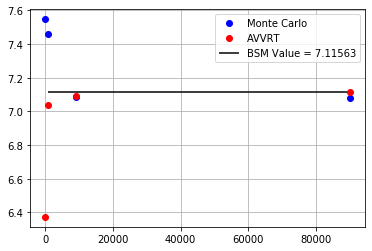

In [131]:
k = [90,900,9000,90000]
plt.plot(k,ans,'bo',label='Monte Carlo')
plt.plot(k,ans2,'ro',label='AVVRT')
plt.hlines(7.11563, 900, 90000, colors='k', linestyles='solid', label='BSM Value = 7.11563')
plt.grid()
plt.legend()
plt.show()